## Spotify Challenge

<div><img style="width: 100%; " src="https://upload.wikimedia.org/wikipedia/commons/1/14/Iyyaka_Nastain_QR-Code_Spotify_Black.png" /></div>

---------

Download the dataset [from Kaggle](https://www.kaggle.com/insiyeah/musicfeatures) (`data.csv`) and read it. You should start by performing basic EDA on it. Afterwards, follow the requirements.

## Features Interpretation


1. Tempo: The speed at which a passage of music is played
2.   Beats: Rythmic unit in music. "A regular, repeating pulse that underlies a musical pattern."
3. Chroma stft: Short Time Fourier Transform
4. RMSE: Root Mean Square Error
5. Spectral centroid: Spectral centroid is the average of frequencies weighted by amplitude, so a high spectral centroid implies that higher frequencies have higher amplitudes.
6. Spectral bandwidth:It is the Wavelength interval in which a radiated spectral quantity is not less than half its maximum value
7. Rolloff: Roll-off is the steepness of a transmission function with frequency
8. Zero crossing rate:The rate at which the signal changes from positive to negative or back
9. MFCC: Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC. https://en.wikipedia.org/wiki/Mel-frequency_cepstrum



In [1]:
# Import necessary libraries #https://riptutorial.com/python/example/11956/pep8-rules-for-imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  silhouette_samples 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
df = pd.read_csv('data.csv')
df.head().T

,0,1,2,3,4
filename,blues.00081.au,blues.00022.au,blues.00031.au,blues.00012.au,blues.00056.au
tempo,103.359,95.7031,151.999,184.57,161.499
beats,50,44,75,91,74
chroma_stft,0.38026,0.306451,0.253487,0.26932,0.391059
rmse,0.248262,0.113475,0.151571,0.119072,0.137728
spectral_centroid,2116.94,1156.07,1331.07,1361.05,1811.08
spectral_bandwidth,1956.61,1497.67,1973.64,1567.8,2052.33
rolloff,4196.11,2170.05,2900.17,2739.63,3927.81
zero_crossing_rate,0.127272,0.0586134,0.0429672,0.0691239,0.0754795
mfcc1,-26.9298,-233.861,-221.803,-207.208,-145.435


In [3]:
# Check for missing values, No missing values
# df.isnull().sum()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [5]:
# Summary statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tempo,1000.0,119.601702,28.297367,54.978391,99.384014,117.453835,135.999178,234.907670
beats,1000.0,57.138000,14.225728,18.000000,47.000000,56.000000,65.250000,117.000000
chroma_stft,1000.0,0.378656,0.081689,0.171782,0.319641,0.383075,0.435974,0.663573
rmse,1000.0,0.130929,0.065685,0.005276,0.086625,0.122448,0.175793,0.398012
spectral_centroid,1000.0,2201.834226,715.961347,569.930721,1627.793931,2209.468780,2691.969702,4434.439444
spectral_bandwidth,1000.0,2242.559613,526.337663,897.994319,1907.136505,2221.408983,2578.474352,3509.578677
rolloff,1000.0,4571.702159,1574.770035,749.062137,3380.956639,4658.671830,5534.197785,8676.405868
zero_crossing_rate,1000.0,0.103637,0.041834,0.021701,0.070281,0.099539,0.132007,0.274829
mfcc1,1000.0,-144.479173,100.235661,-552.064063,-200.695133,-120.206072,-73.895019,42.034587
mfcc2,1000.0,99.552199,31.331904,-1.527148,76.811480,98.452551,119.893638,193.096518


## Feature Analysis

**Average tempo by genre**

The speed or pace at which a passage of music is played.
https://learningmusic.ableton.com/make-beats/tempo-and-genre.html

Text(0, 0.5, 'Mean Tempo')

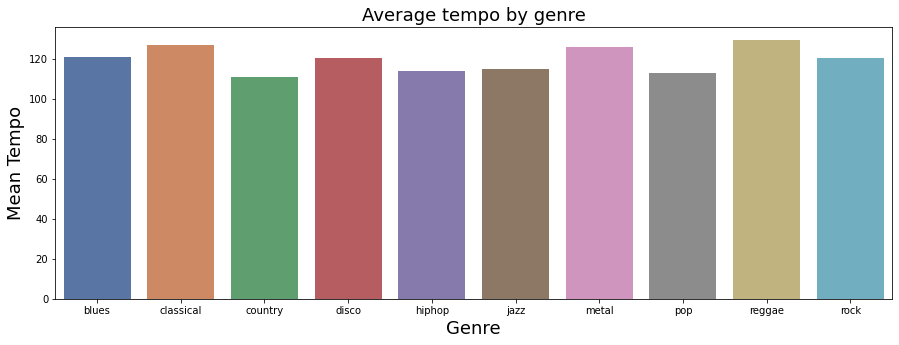

In [6]:
plt.figure(figsize=(15,5))
genres = df['label'].unique()
tempos = [df[df['label']==x].tempo.mean() for x in genres ]
sns.barplot(x=genres, y=tempos, palette='deep')
plt.title('Average tempo by genre', fontsize = 18)
plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Mean Tempo', fontsize = 18)

The average tempo are very similar across the genres presented in this dataset.

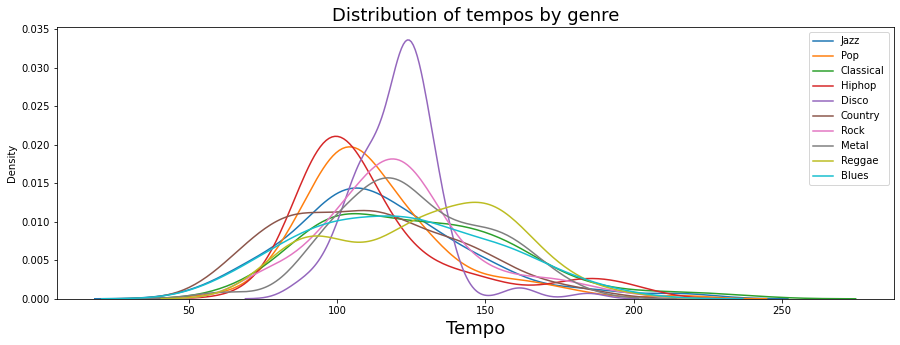

In [29]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=df.loc[df['label']=='jazz', 'tempo'], label="Jazz")
sns.kdeplot(data=df.loc[df['label']=='pop', 'tempo'], label="Pop")
sns.kdeplot(data=df.loc[df['label']=='classical', 'tempo'], label="Classical")
sns.kdeplot(data=df.loc[df['label']=='hiphop', 'tempo'], label="Hiphop")
sns.kdeplot(data=df.loc[df['label']=='disco', 'tempo'], label="Disco")
sns.kdeplot(data=df.loc[df['label']=='country', 'tempo'], label="Country")
sns.kdeplot(data=df.loc[df['label']=='rock', 'tempo'], label="Rock")
sns.kdeplot(data=df.loc[df['label']=='metal', 'tempo'], label="Metal")
sns.kdeplot(data=df.loc[df['label']=='reggae', 'tempo'], label="Reggae")
sns.kdeplot(data=df.loc[df['label']=='blues', 'tempo'], label="Blues")

plt.title("Distribution of tempos by genre", fontsize = 18)
plt.xlabel("Tempo", fontsize = 18)
plt.legend()

Most of the genres have fairly normal distributions with peaks around 100 beats per minute(bpm).

Disco is distinctly different, with a peak closer to 150 bpm.

Classical and Jazz are the most diverse, having less prominent peaks and a wider spread of tempos.


**Spectral centroid mean**

Spectral centroid is the average of frequencies weighted by amplitude, so a high spectral centroid implies that higher frequencies have higher amplitudes.

Text(0, 0.5, 'Mean Spectral Centroid')

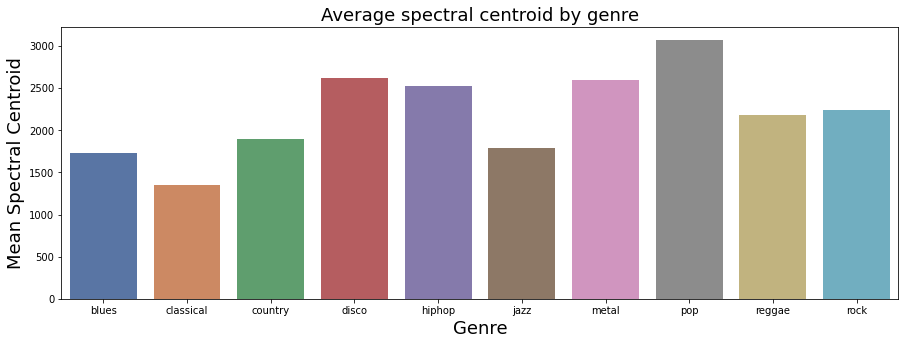

In [8]:
plt.figure(figsize=(15,5))
spectral_centroids = [df[df['label']==x].spectral_centroid.mean() for x in genres ]
sns.barplot(x=genres, y=spectral_centroids, palette='deep')
plt.title('Average spectral centroid by genre', fontsize = 18)
plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Mean Spectral Centroid', fontsize = 18)

Songs in the classical, jazz, and country genres seem to trend toward lower spectral centroids, while pop, disco, hiphop, and metal songs tend to have higher centroids. It's possible that high spectral centroids could be correlated with catchy songs that grab your attention with high frequencies, while low spectral centroids correlate with low-toned, more relaxed music that is more common in classical, jazz, and country.


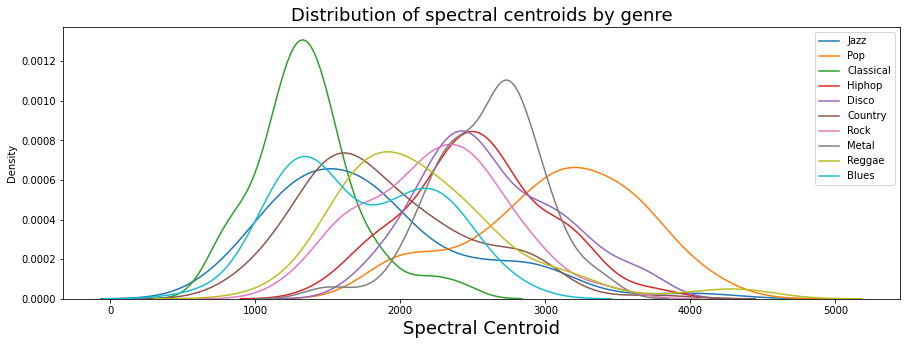

In [31]:
plt.figure(figsize=(15,5))

sns.kdeplot(data=df.loc[df['label']=='jazz', 'spectral_centroid'], label="Jazz")
sns.kdeplot(data=df.loc[df['label']=='pop', 'spectral_centroid'], label="Pop")
sns.kdeplot(data=df.loc[df['label']=='classical', 'spectral_centroid'], label="Classical")
sns.kdeplot(data=df.loc[df['label']=='hiphop', 'spectral_centroid'], label="Hiphop")
sns.kdeplot(data=df.loc[df['label']=='disco', 'spectral_centroid'], label="Disco")
sns.kdeplot(data=df.loc[df['label']=='country', 'spectral_centroid'], label="Country")
sns.kdeplot(data=df.loc[df['label']=='rock', 'spectral_centroid'], label="Rock")
sns.kdeplot(data=df.loc[df['label']=='metal', 'spectral_centroid'], label="Metal")
sns.kdeplot(data=df.loc[df['label']=='reggae', 'spectral_centroid'], label="Reggae")
sns.kdeplot(data=df.loc[df['label']=='blues', 'spectral_centroid'], label="Blues")

plt.title("Distribution of spectral centroids by genre", fontsize = 18)
plt.xlabel("Spectral Centroid", fontsize = 18)
plt.legend()

Songs in the classical, jazz, and country genres seem to trend toward lower spectral centroids, while pop, disco, hiphop, and metal songs tend to have higher centroids. High spectral centroids seems to be correlated with catchy songs that grab your attention with high frequencies, while low spectral centroids correlate with low-toned, more relaxed music that is more common in classical, jazz, and country.

The classical and metal genres both have fairly low variance, implying that they are less diverse in terms of spectral centroids.

**Spectral Bandwidth Mean**

Text(0, 0.5, 'Mean Spectral Bandwidth')

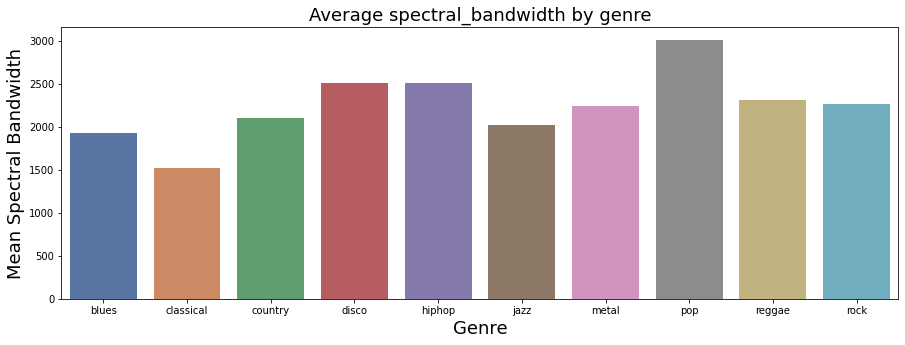

In [9]:
plt.figure(figsize=(15,5))
spectral_bandwidths = [ df[df['label']==x].spectral_bandwidth.mean() for x in genres ]
sns.barplot(x=genres, y=spectral_bandwidths, palette='deep')
plt.title('Average spectral_bandwidth by genre', fontsize = 18)
plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Mean Spectral Bandwidth', fontsize = 18)

Results looks similar to spectral centroid.

**Roll-off mean**

Text(0, 0.5, 'Rolloff')

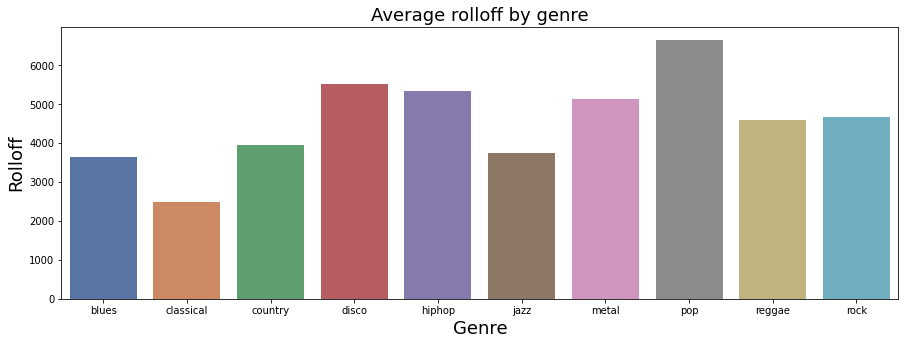

In [10]:
plt.figure(figsize=(15,5))
rolloffs = [df[df['label']==x].rolloff.mean() for x in genres ]
sns.barplot(x=genres, y=rolloffs, palette='deep')
plt.title('Average rolloff by genre', fontsize = 18)
plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Rolloff', fontsize = 18)

Also similar to the means of the spectral bandwidth.

## Correlation Analysis

In [11]:
#https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
labelencoder = LabelEncoder()
df['label_cat'] = labelencoder.fit_transform(df['label'])

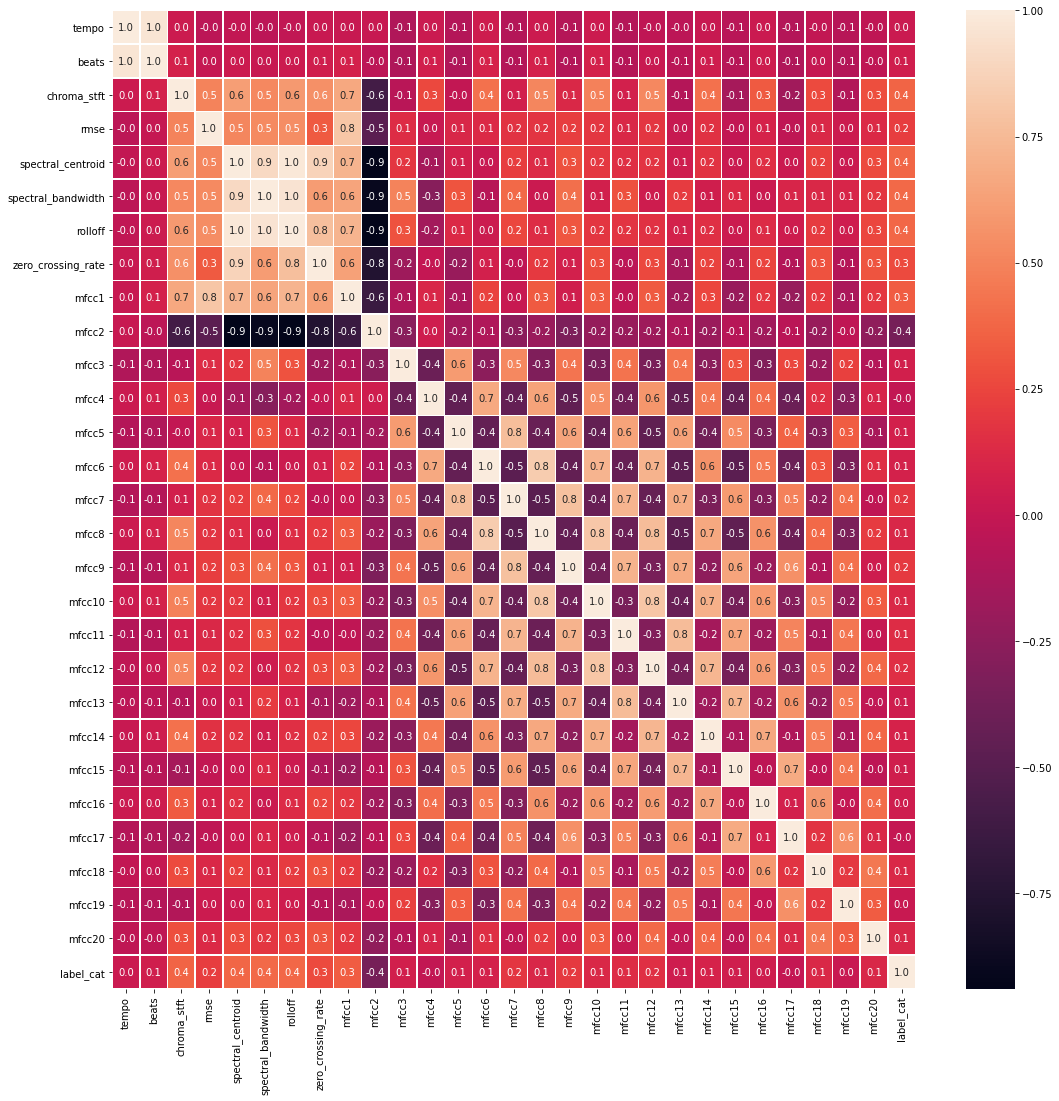

In [12]:
# Correlation heatmap
f,ax = plt.subplots(figsize=(18, 18))
cor = df.corr()
sns.heatmap(cor, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [13]:
#Correlation with output variable
cor_target = abs(cor['label_cat'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

label_cat    1.0
Name: label_cat, dtype: float64

No variable is highly correlated to the target. However, some variables are highly correlated with each other, with PCA we can take care of the multicollinearity. For example mfc2 is highly correlated with beats, chroma_stft, rmse up to rolloff.

In [14]:
# checking for balance in the data
df['label'].value_counts()

jazz         100
disco        100
hiphop       100
blues        100
reggae       100
country      100
pop          100
classical    100
rock         100
metal        100
Name: label, dtype: int64

In [15]:
# Scaling the dataset
data = df.iloc[:,1:29]
X_std = MinMaxScaler().fit_transform(data)
y = df['label_cat']

## PCA & Logistic Regression

In [16]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_std,y, test_size = 0.2, random_state=132,stratify=y)
print(X_train.shape, X_test.shape)

(800, 28) (200, 28)


In [17]:
# confirming test dataset is properly stratified
y_test.value_counts()

9    20
8    20
7    20
6    20
5    20
4    20
3    20
2    20
1    20
0    20
Name: label_cat, dtype: int64

Best parameter (CV score=0.616):
{'logistic__C': 21.54434690031882, 'pca__n_components': 21}


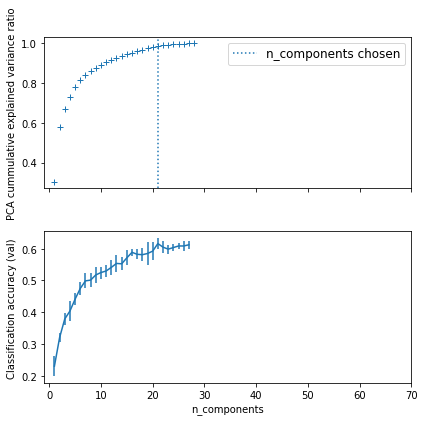

Cummulative explained variance ratio: [0.3040059  0.58036373 0.66938073 0.72880146 0.7806895  0.814399
 0.84151337 0.8609464  0.87809182 0.89331392 0.90597869 0.91740834
 0.92742914 0.93711243 0.9457269  0.95403067 0.96143964 0.96838258
 0.97485706 0.9804697  0.98578137 0.99085948 0.9943562  0.99705681
 0.99849296 0.99936795 0.99986261 1.        ]


In [62]:
# https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html
# https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': np.arange(28),
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print('Best parameter (CV score=%0.3f):' % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_std)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         np.cumsum(pca.explained_variance_ratio_), '+', linewidth=2)
ax0.set_ylabel('PCA cummulative explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

print(f'Cummulative explained variance ratio:',np.cumsum(pca.explained_variance_ratio_))

In [63]:
y_pred = search.predict(X_test)
print('Test set: {:6.2f}%'.format(100*search.score(X_test, y_test)))

Test set:  64.00%


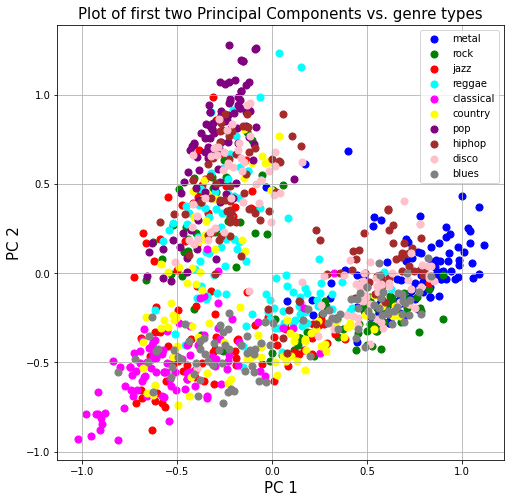

In [20]:
#Bivariate Plot PC1 and PC2

pca = PCA(n_components=21)
Principal_components = pca.fit_transform(X_std)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2','PC 3', 'PC 4', 'PC 5', 'PC 6', 
                                                              'PC 7', 'PC 8','PC 9','PC 10', 'PC 11', 'PC 12', 
                                                              'PC 13', 'PC 14', 'PC 15','PC 16','PC 17', 'PC 18',
                                                              'PC 19','PC 20', 'PC 21'])
pca_df['label'] = df['label']

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot of first two Principal Components vs. genre types', fontsize = 15)
group = ['metal','rock','jazz','reggae','classical','country', 'pop','hiphop','disco','blues']
colors = ['blue','green','red','cyan','magenta','yellow','purple','brown','pink','gray']

for label, color in zip(group,colors):
    indicesToKeep = pca_df['label'] == label
    ax.scatter(pca_df.loc[indicesToKeep, 'PC 1']
               , pca_df.loc[indicesToKeep, 'PC 2']
               , c = color, s = 50)
ax.legend(group)
ax.grid()

While some of the music files in the genres like metal, classical and pop are very distinct and segmented, genres like disco, rock country and raggea overlap with other genre types.

In [21]:
# print to dict the encoded information
d1 = df.drop_duplicates('label').drop(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20'],axis=1).set_index('label')
dict_map = d1.to_dict()
d = dict_map['label_cat']
print(d)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


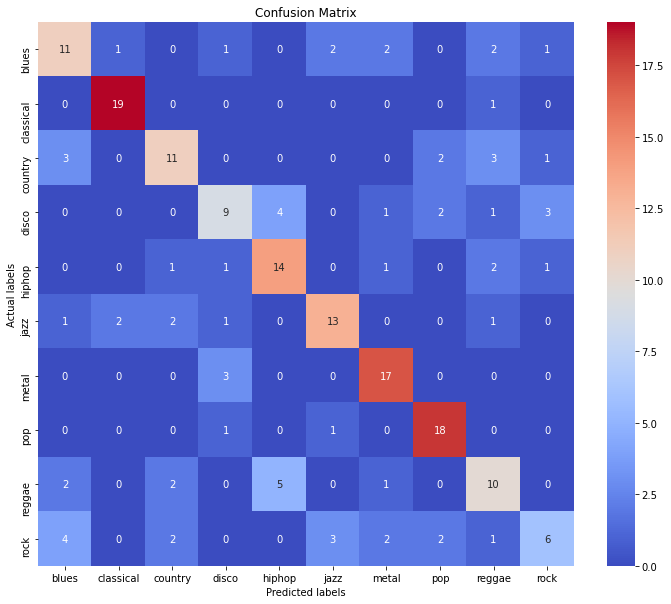

In [22]:
labels = list(d.keys())
cm = confusion_matrix(y_test,y_pred) 

# plot cm
plt.figure(figsize=(12,10))
ax = plt.subplot()
sns.heatmap(cm, annot=True, cmap='coolwarm',fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); 
ax.yaxis.set_ticklabels(labels);

##T-SNE for visualization

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.008s...
[t-SNE] Computed neighbors for 1000 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 56.858913
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.155590
[t-SNE] KL divergence after 2000 iterations: 0.373037


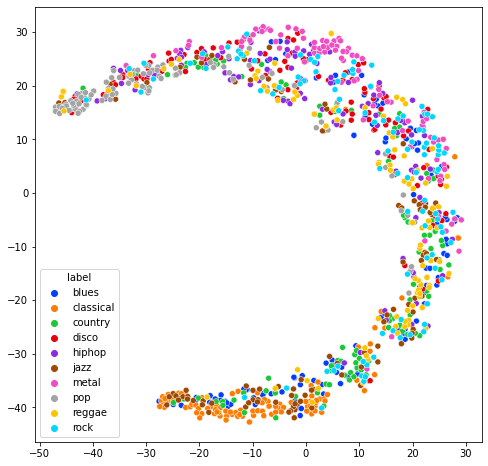

In [23]:
# Invoke the TSNE method https://towardsdatascience.com/why-you-are-using-t-sne-wrong-502412aab0c0
# https://towardsdatascience.com/t-sne-python-example-1ded9953f26
fig = plt.figure(figsize = (8,8))
tsne = TSNE(verbose=1, perplexity=40, n_iter=2000,learning_rate=200,random_state=17)
X_embedded = tsne.fit_transform(data)
y = df['label']
palette = sns.color_palette('bright', 10)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

## Clustering

https://towardsdatascience.com/k-means-clustering-using-spotify-song-features-9eb7d53d105c

KMeans is for unsupervised learning, so the label will not be used in the dataset.

The following step was to find a cluster quality metric based on a selection of a few features.

In [45]:
df1 = df[['filename', 'tempo','chroma_stft','label']]
X = MinMaxScaler().fit_transform(df1.drop(['filename','label'], axis=1))

In [46]:
# I aim to separate relaxed track from energetic sounds
kmeans = KMeans(init='k-means++', n_clusters=2,random_state=15).fit(X)
y_kmeans = kmeans.predict(X)

df1['kmeans'] = y_kmeans
df1.head()

,filename,tempo,chroma_stft,label,kmeans
0,blues.00081.au,103.359375,0.380260,blues,1
1,blues.00022.au,95.703125,0.306451,blues,0
2,blues.00031.au,151.999081,0.253487,blues,0
3,blues.00012.au,184.570312,0.269320,blues,0
4,blues.00056.au,161.499023,0.391059,blues,1


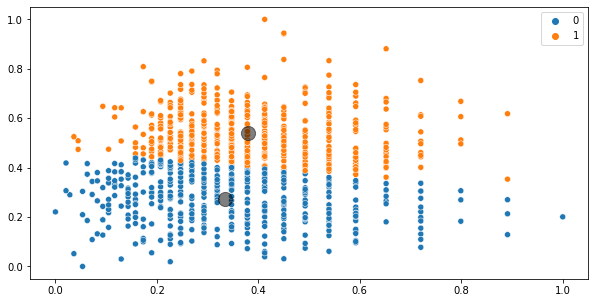

In [49]:
# plotting the clusters
plt.figure(figsize=(10,5))
sns.scatterplot(X[:, 0], X[:, 1],hue=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [48]:
print(f'Silhouette Score(n=2): {silhouette_score(X, y_kmeans)}')

Silhouette Score(n=2): 0.3380890373118313


In [50]:
grouped = df1.groupby(['label', 'kmeans']).count().drop(['filename','chroma_stft'], axis=1)
grouped

tempo
label     kmeans       
blues     0          64
          1          36
classical 0          96
          1           4
country   0          75
          1          25
disco     0          17
          1          83
hiphop    0           6
          1          94
jazz      0          89
          1          11
metal     0           2
          1          98
pop       0          34
          1          66
reggae    0          27
          1          73
rock      0          38
          1          62

This clearly shows that the clusters are not well apart from each other which is also clear from the scatterplot.